## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

df0 = pd.DataFrame(mouse_metadata)
df1 = pd.DataFrame(study_results)

print('mouse metadata')
df0.info()

print('-------------------')

print('study results')
df1.info()


mouse metadata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
-------------------
study results
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [2]:
# Combine the data into a single dataset
df_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
df_merge.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
df_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
m_list = df_merge['Mouse ID']
m_count = len(m_list)
m_count


1893

In [5]:
# unique mice

m_list = df_merge['Mouse ID'].unique()
m_count_unique = len(m_list)
m_count_unique



249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined = df_merge

df_combined.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
df_duplicated = df_combined[df_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]

df_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

df_duplicated_by_id = df_combined[df_combined.duplicated()]


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_combined.drop_duplicates(keep=False, inplace=True)

df_reset = df_combined.reset_index().set_index('Mouse ID')

df_clean = df_reset.drop(['g989']).reset_index()
df_clean

,Mouse ID,index,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,0,45.000000,0
1,k403,1,Ramicane,Male,21,16,5,38.825898,0
2,k403,2,Ramicane,Male,21,16,10,35.014271,1
3,k403,3,Ramicane,Male,21,16,15,34.223992,1
4,k403,4,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,z969,1888,Naftisol,Male,9,30,25,63.145652,2
1876,z969,1889,Naftisol,Male,9,30,30,65.841013,3
1877,z969,1890,Naftisol,Male,9,30,35,69.176246,4
1878,z969,1891,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
df_clean['Mouse ID'].nunique()


248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


df_groupby = df_clean.groupby(['Drug Regimen'])

t_v = 'Tumor Volume (mm3)'


drug_regimen = pd.DataFrame({'Mean': df_groupby[t_v].mean()})
drug_regimen['Median'] = df_groupby[t_v].median()
drug_regimen['Variance'] = df_groupby[t_v].var()
drug_regimen['Stdev'] = df_groupby[t_v].std()
drug_regimen['SEM'] = df_groupby[t_v].sem()

df_summary = drug_regimen.sort_values(by='Mean')

df_summary



,Mean,Median,Variance,Stdev,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_groupby_agg = df_clean.groupby(['Drug Regimen'])

# Using the aggregation method, produce the same summary statistics in a single line
df_groupby_agg[t_v].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(78.0, 0.5, 'Count')

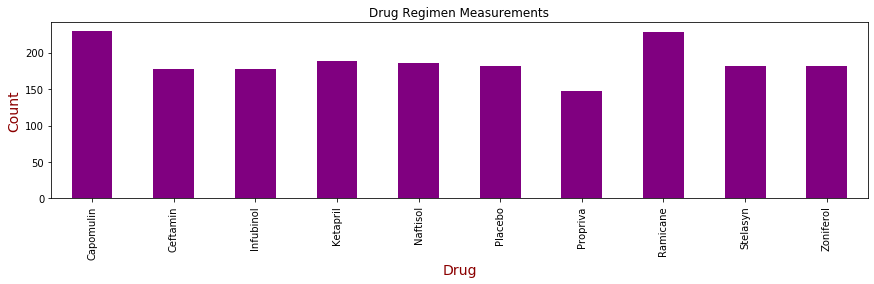

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



title = 'Drug Regimen Measurements'

df_measurements = df_clean.groupby(['Drug Regimen']).count()['Mouse ID']

df_measurements.plot(
    kind='bar',
    title=title, 
    color='purple', 
    figsize=(12,4),
)

x = 'Drug'
y = 'Count'


plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.xlabel(x, color='darkred', size=14)
plt.ylabel(y, color='darkred', size=14)



Text(0, 0.5, 'Count')

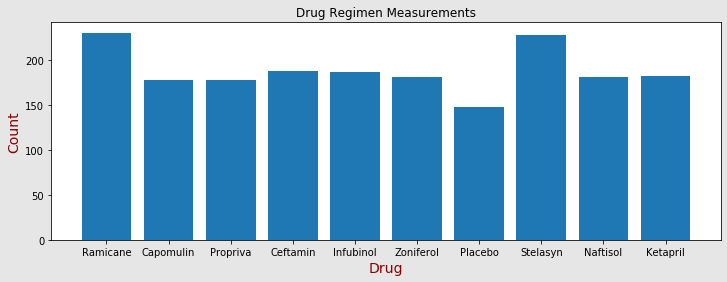

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# dr = 'Drug Regimen'


plt.figure(figsize=(12,4), facecolor='0.9')
plt.bar(df_summary.index.to_list(), df_measurements.to_list())
plt.title(title)
plt.xlabel(x, color='darkred', size=14)
plt.ylabel(y, color='darkred', size=14)



In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
